<a href="https://colab.research.google.com/github/RiddhimanRaut/Deep-Learning-based-CPR-estimation/blob/main/RNN_CPR_diff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
url = "https://github.com/RiddhimanRaut/Deep-Learning-based-CPR-estimation/blob/main/excel_dataset.xlsx?raw=true"
df = pd.read_excel(url)
df = df[5::6] #Hour-wise Data
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')
timestamp_s = date_time.map(pd.Timestamp.timestamp)
day = 24*60*60
year = (365.2425)*day
df['Day sin' ] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos' ] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))
df.head()

In [60]:
dataset = np.array(df['CPRAVG'])
dataset = dataset.reshape(-1,1)
n = len(dataset)
training_set = dataset[0:int(n*0.7)]
test_set = dataset[int(n*0.7):n]

In [61]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [62]:
X_train = []
y_train = []
training_length = len(training_set_scaled)
for i in range(60, training_length):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [63]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [64]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
44/44 [==============================] - 13s 112ms/step - loss: 0.1546
Epoch 2/30
44/44 [==============================] - 5s 112ms/step - loss: 0.0096
Epoch 3/30
44/44 [==============================] - 5s 119ms/step - loss: 0.0078
Epoch 4/30
44/44 [==============================] - 5s 117ms/step - loss: 0.0067
Epoch 5/30
44/44 [==============================] - 5s 112ms/step - loss: 0.0074
Epoch 6/30
44/44 [==============================] - 5s 120ms/step - loss: 0.0059
Epoch 7/30
44/44 [==============================] - 5s 121ms/step - loss: 0.0065
Epoch 8/30
44/44 [==============================] - 5s 114ms/step - loss: 0.0072
Epoch 9/30
44/44 [==============================] - 5s 114ms/step - loss: 0.0063
Epoch 10/30
44/44 [==============================] - 5s 122ms/step - loss: 0.0073
Epoch 11/30
44/44 [==============================] - 5s 114ms/step - loss: 0.0072
Epoch 12/30
44/44 [==============================] - 5s 115ms/step - loss: 0.0061
Epoch 13/30
44/44 [=====

In [65]:
test_set_scaled = sc.transform(test_set)
test_length = len(test_set_scaled)
X_test = []
for i in range(60, test_length):
    X_test.append(test_set_scaled[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape


(564, 60, 1)

In [66]:
predicted_CPRAVG = regressor.predict(X_test)
predicted_CPRAVG = sc.inverse_transform(predicted_stock_price)

In [ ]:
predicted_CPRAVG

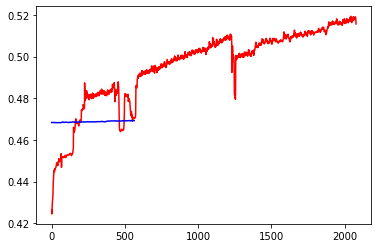

In [76]:
plt.plot(dataset, color = 'red', label = "Real CPRAVG")
plt.plot(predicted_CPRAVG, color = 'blue', label = 'Predicted CPRAVG')

In [75]:
dataset = df.iloc[:,0].values
dataset.shape

(2078,)